# 🚢 Titanic Survival Prediction - End-to-End ML Project

**Author:** ML Engineer  
**Project Type:** Binary Classification  
**Framework:** Scikit-Learn, Pandas, Matplotlib, Seaborn  

---

## 1. PROBLEM STATEMENT

### Business Objective
Build a predictive model to determine whether a passenger on the Titanic survived or not based on demographic and travel information.

### Problem Type
**Binary Classification** - Predict survival (0 = Did not survive, 1 = Survived)

### Input Features
- **Pclass**: Passenger Class (1st, 2nd, 3rd)
- **Sex**: Gender of the passenger
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Passenger fare
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Target Variable
- **Survived**: 0 (Did not survive) or 1 (Survived)

### Success Criteria
- Achieve **>80% accuracy** on test set
- Maximize **F1-score** to balance precision and recall
- Create a **production-ready pipeline** for deployment

### Why Classification?
This is a classification problem because we're predicting a categorical outcome (survived or not) rather than a continuous value. The model will learn patterns from historical data to classify new passengers into these two categories.

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

## 2. DATA UNDERSTANDING & EXPLORATORY DATA ANALYSIS (EDA)

### 2.1 Load Dataset

In [ ]:
# Load the Titanic dataset
# Note: Download from https://www.kaggle.com/c/titanic/data or use seaborn
df = sns.load_dataset('titanic')

print("📊 Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

📊 Dataset loaded successfully!

Dataset Shape: (891, 15)
Rows: 891, Columns: 15


### 2.2 Initial Data Overview

In [ ]:
# Display first few rows
print("\n📋 First 5 Rows:")
df.head()


📋 First 5 Rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Data types and non-null counts
print("\n🔍 Dataset Info:")
df.info()


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Statistical summary
print("\n📈 Statistical Summary:")
df.describe()


📈 Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.3 Missing Values Analysis


❌ Missing Values:
             Missing Count  Percentage
deck                   688   77.216611
age                    177   19.865320
embarked                 2    0.224467
embark_town              2    0.224467


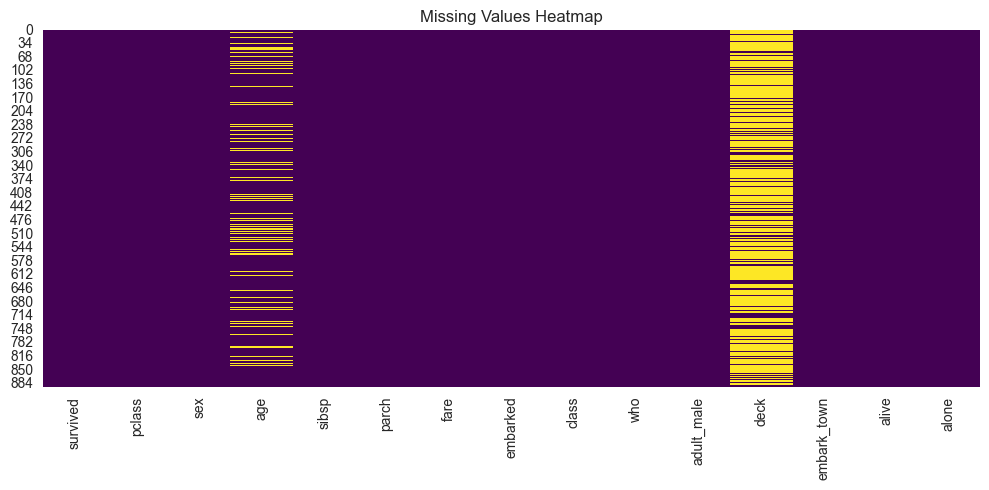


💡 Insight: Age, Cabin, and Embarked have missing values that need handling.


In [ ]:
# Check for missing values
print("\n❌ Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

print("\n💡 Insight: Age, Cabin, and Embarked have missing values that need handling.")

### 2.4 Target Variable Analysis


🎯 Survival Distribution:
survived
0    549
1    342
Name: count, dtype: int64

Survival Rate: 38.38%


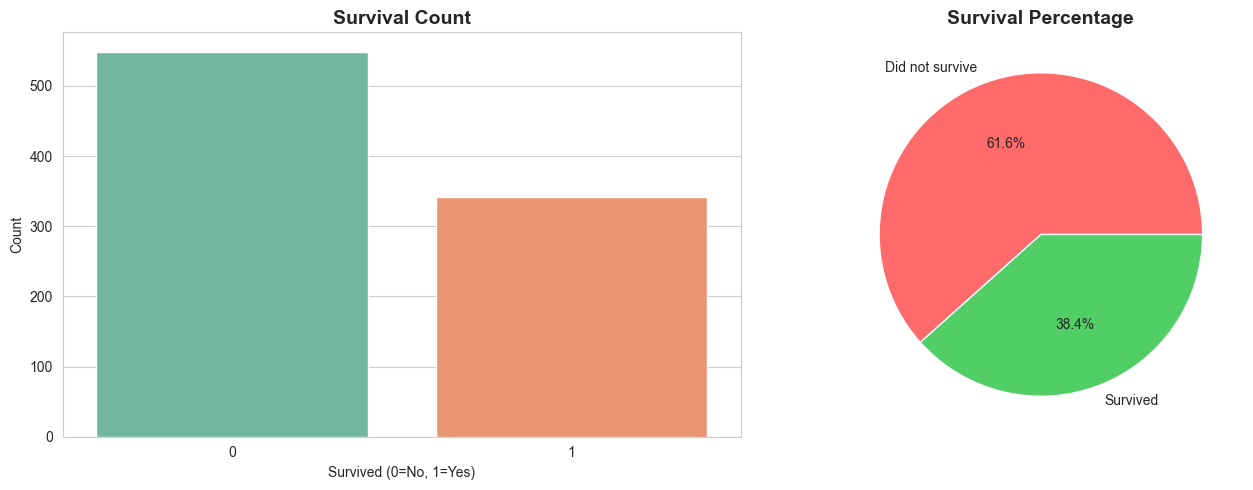


💡 Insight: Dataset is imbalanced - more passengers did not survive.


In [ ]:
# Survival distribution
print("\n🎯 Survival Distribution:")
print(df['survived'].value_counts())
print(f"\nSurvival Rate: {df['survived'].mean():.2%}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='survived', ax=ax1, palette='Set2')
ax1.set_title('Survival Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Survived (0=No, 1=Yes)')
ax1.set_ylabel('Count')

# Pie chart
df['survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Did not survive', 'Survived'],
    colors=['#ff6b6b', '#51cf66'],
    ax=ax2
)
ax2.set_title('Survival Percentage', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

print("\n💡 Insight: Dataset is imbalanced - more passengers did not survive.")

### 2.5 Survival by Gender


👫 Survival by Gender:
survived         0         1
sex                         
female    0.257962  0.742038
male      0.811092  0.188908


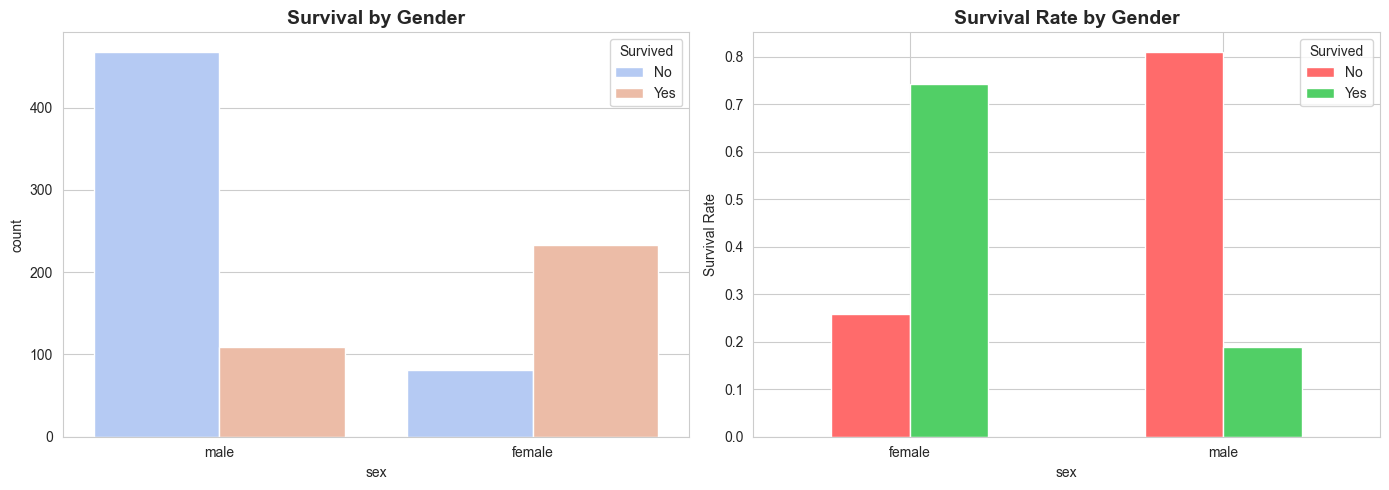


💡 Insight: Females had significantly higher survival rates (~74%) compared to males (~19%).


In [ ]:
# Gender vs Survival
print("\n👫 Survival by Gender:")
gender_survival = pd.crosstab(df['sex'], df['survived'], normalize='index')
print(gender_survival)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='sex', hue='survived', ax=ax1, palette='coolwarm')
ax1.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax1.legend(title='Survived', labels=['No', 'Yes'])

gender_survival.plot(kind='bar', ax=ax2, color=['#ff6b6b', '#51cf66'])
ax2.set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
ax2.set_ylabel('Survival Rate')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

print("\n💡 Insight: Females had significantly higher survival rates (~74%) compared to males (~19%).")

### 2.6 Survival by Passenger Class


🎫 Survival by Passenger Class:
survived         0         1
pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


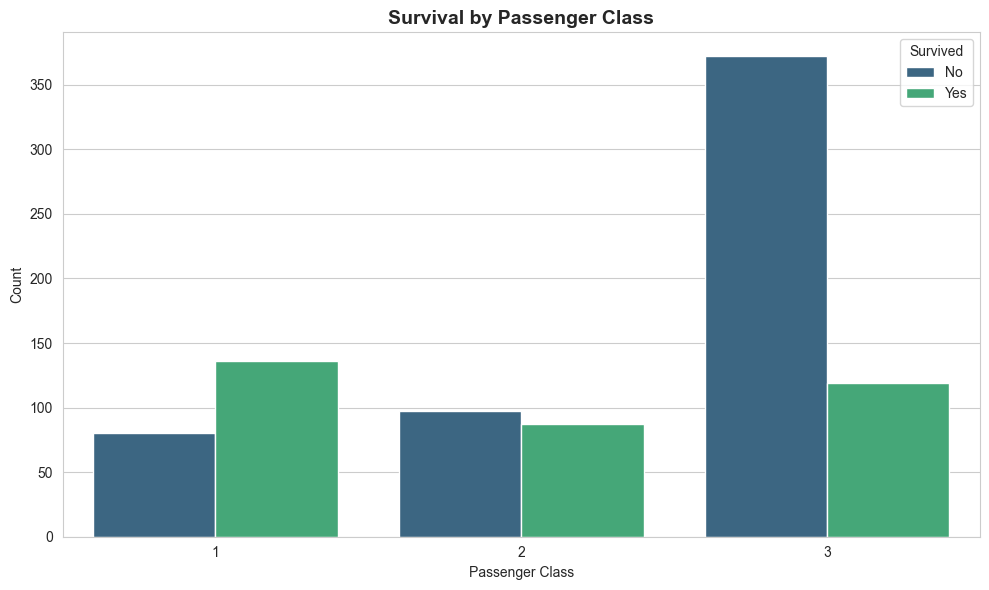


💡 Insight: First-class passengers had the highest survival rate (~63%), followed by second (~47%), then third (~24%).


In [ ]:
# Passenger Class vs Survival
print("\n🎫 Survival by Passenger Class:")
class_survival = pd.crosstab(df['pclass'], df['survived'], normalize='index')
print(class_survival)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='pclass', hue='survived', palette='viridis', ax=ax)
ax.set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

print("\n💡 Insight: First-class passengers had the highest survival rate (~63%), followed by second (~47%), then third (~24%).")

### 2.7 Age Distribution vs Survival

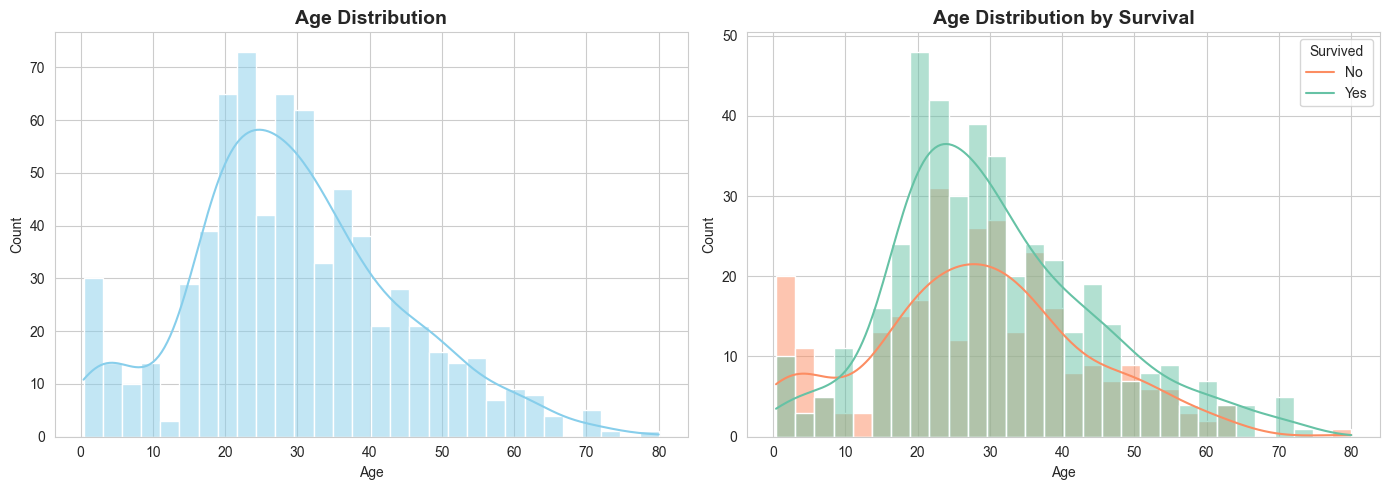


💡 Insight: Children (age < 10) had better survival rates. Most passengers were between 20-40 years.


In [ ]:
# Age distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Overall age distribution
sns.histplot(data=df, x='age', kde=True, bins=30, ax=ax1, color='skyblue')
ax1.set_title('Age Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age')

# Age distribution by survival
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30, ax=ax2, palette='Set2')
ax2.set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
ax2.set_xlabel('Age')
ax2.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

print("\n💡 Insight: Children (age < 10) had better survival rates. Most passengers were between 20-40 years.")

---

## 3. DATA CLEANING & PREPROCESSING

### 3.1 Select Relevant Features

In [ ]:
# Select features for modeling
# Drop columns: 'deck', 'embark_town', 'alive', 'who', 'adult_male', 'class', 'alone'
selected_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
df_clean = df[selected_features].copy()

print(f"✅ Selected {len(selected_features)-1} features for modeling")
print(df_clean.head())

✅ Selected 7 features for modeling
   pclass     sex   age  sibsp  parch     fare embarked  survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0


### 3.2 Handle Missing Values

**Strategy:**
- **Age**: Impute with median (robust to outliers)
- **Embarked**: Impute with mode (most frequent value)
- **Fare**: Impute with median (if any missing)

In [ ]:
# Check missing values before imputation
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Fill missing values
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
df_clean['embarked'].fillna(df_clean['embarked'].mode()[0], inplace=True)
df_clean['fare'].fillna(df_clean['fare'].median(), inplace=True)

print("\n✅ Missing values after cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64

✅ Missing values after cleaning:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


---

## 4. FEATURE ENGINEERING

Create new meaningful features to improve model performance.

In [ ]:
# Create FamilySize feature
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1

# Create IsAlone feature
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

# Create Age groups
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 12, 18, 35, 60, 100], 
                                labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

print("✅ New features created:")
print("  - family_size: Total family members aboard")
print("  - is_alone: Binary indicator if traveling alone")
print("  - age_group: Categorical age groups")
print(f"\nDataset shape: {df_clean.shape}")
df_clean.head()

✅ New features created:
  - family_size: Total family members aboard
  - is_alone: Binary indicator if traveling alone
  - age_group: Categorical age groups

Dataset shape: (891, 11)


,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size,is_alone,age_group
0,3,male,22.0,1,0,7.2500,S,0,2,0,Adult
1,1,female,38.0,1,0,71.2833,C,1,2,0,Middle-aged
2,3,female,26.0,0,0,7.9250,S,1,1,1,Adult
3,1,female,35.0,1,0,53.1000,S,1,2,0,Adult
4,3,male,35.0,0,0,8.0500,S,0,1,1,Adult


---

## 5. TRAIN-TEST SPLIT

### Why Stratified Sampling?
Stratified sampling ensures that both train and test sets have the same proportion of survived/not survived passengers as the original dataset, preventing sampling bias.

In [ ]:
# Separate features and target
X = df_clean.drop(['survived', 'age_group'], axis=1)  # Drop age_group for now (for simplicity)
y = df_clean['survived']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Data split complete:")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X):.1%})")
print(f"  Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X):.1%})")
print(f"\n📊 Class distribution in train set:")
print(y_train.value_counts(normalize=True))
print(f"\n📊 Class distribution in test set:")
print(y_test.value_counts(normalize=True))

✅ Data split complete:
  Training set: 712 samples (79.9%)
  Test set: 179 samples (20.1%)

📊 Class distribution in train set:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

📊 Class distribution in test set:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


---

## 6. MODEL BUILDING

### 6.1 Define Preprocessing Pipeline

**Why Pipeline?**
- Prevents data leakage
- Ensures reproducibility
- Makes deployment easier

In [ ]:
# Define numerical and categorical features
numerical_features = ['age', 'fare', 'family_size', 'sibsp', 'parch']
categorical_features = ['pclass', 'sex', 'embarked', 'is_alone']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Preprocessing pipeline created")
print(f"  Numerical features: {numerical_features}")
print(f"  Categorical features: {categorical_features}")

✅ Preprocessing pipeline created
  Numerical features: ['age', 'fare', 'family_size', 'sibsp', 'parch']
  Categorical features: ['pclass', 'sex', 'embarked', 'is_alone']


### 6.2 Train Multiple Models

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Pipeline': pipeline
    }
    
    print(f"  ✅ {name} trained successfully")

print("\n✅ All models trained!")


🔄 Training Logistic Regression...
  ✅ Logistic Regression trained successfully

🔄 Training Decision Tree...
  ✅ Decision Tree trained successfully

🔄 Training Random Forest...
  ✅ Random Forest trained successfully

🔄 Training SVM...
  ✅ SVM trained successfully

✅ All models trained!


---

## 7. MODEL EVALUATION

### 7.1 Compare Model Performance


📊 MODEL COMPARISON:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8212     0.8246  0.6812    0.7460
Decision Tree          0.7989     0.7538  0.7101    0.7313
Random Forest          0.8212     0.7846  0.7391    0.7612
SVM                    0.8268     0.8167  0.7101    0.7597


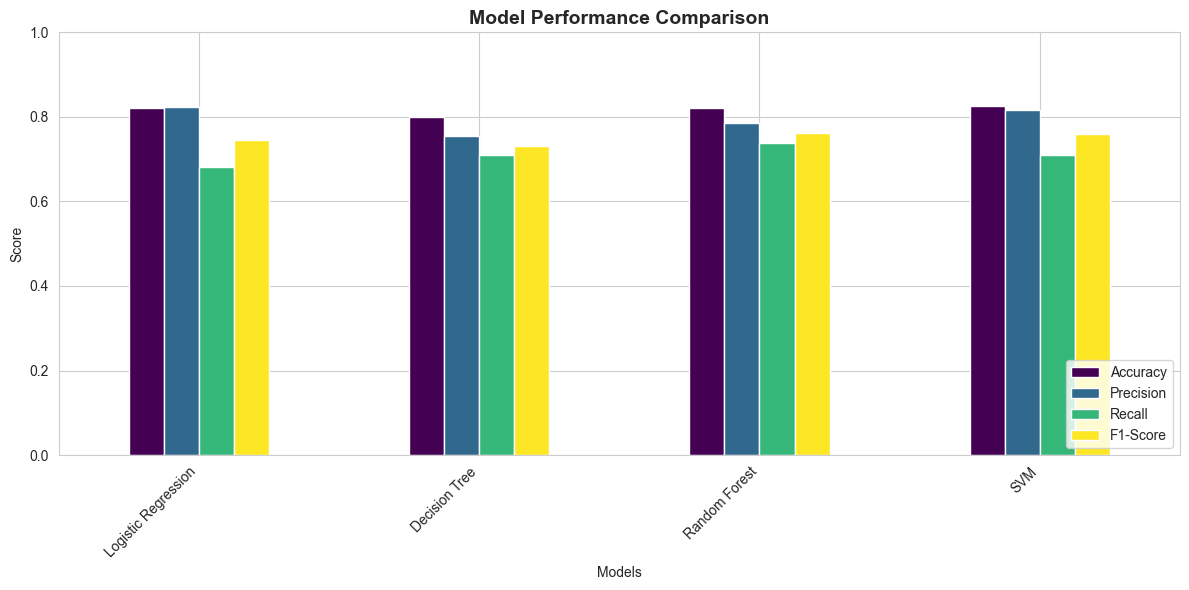


🏆 Best Model: Random Forest
   F1-Score: 0.7612


In [ ]:
# Create results dataframe
results_df = pd.DataFrame({
    model: {metric: results[model][metric] 
            for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}
    for model in results.keys()
}).T

print("\n📊 MODEL COMPARISON:")
print("="*70)
print(results_df.round(4))
print("="*70)

# Visualize results
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Find best model
best_model_name = results_df['F1-Score'].idxmax()
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

### 7.2 Confusion Matrix

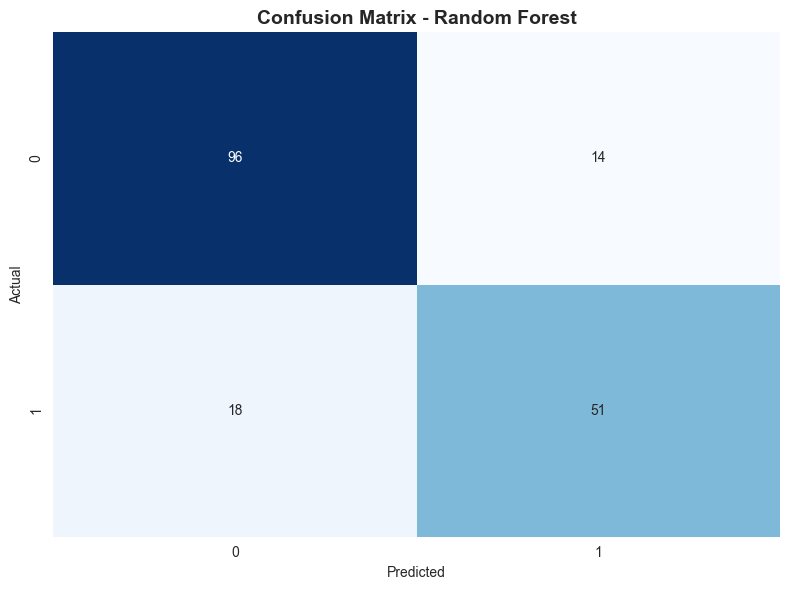


📋 Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.84      0.87      0.86       110
       Survived       0.78      0.74      0.76        69

       accuracy                           0.82       179
      macro avg       0.81      0.81      0.81       179
   weighted avg       0.82      0.82      0.82       179



In [ ]:
# Get best model predictions
best_pipeline = results[best_model_name]['Pipeline']
y_pred_best = best_pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Did not survive', 'Survived']))

### 7.3 Metric Trade-offs Explanation

**Accuracy**: Overall correctness - good when classes are balanced  
**Precision**: Of all predicted survivors, how many actually survived? (Minimize false positives)  
**Recall**: Of all actual survivors, how many did we correctly identify? (Minimize false negatives)  
**F1-Score**: Harmonic mean of precision and recall - best overall metric for imbalanced data  

---

## 8. HYPERPARAMETER TUNING

### Using GridSearchCV for Random Forest

In [ ]:
# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create pipeline for tuning
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("🔍 Starting hyperparameter tuning...")
print(f"   Testing {len(param_grid['classifier__n_estimators']) * len(param_grid['classifier__max_depth']) * len(param_grid['classifier__min_samples_split']) * len(param_grid['classifier__min_samples_leaf'])} combinations")

# GridSearchCV
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n✅ Tuning complete!")
print(f"\n🏆 Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

🔍 Starting hyperparameter tuning...
   Testing 108 combinations
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Tuning complete!

🏆 Best Parameters:
   classifier__max_depth: 10
   classifier__min_samples_leaf: 1
   classifier__min_samples_split: 5
   classifier__n_estimators: 50

📊 Best Cross-Validation F1-Score: 0.7649


In [ ]:
# Evaluate tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)

print("\n📊 TUNED MODEL PERFORMANCE:")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_tuned):.4f}")
print("="*50)


📊 TUNED MODEL PERFORMANCE:
Accuracy:  0.8101
Precision: 0.7869
Recall:    0.6957
F1-Score:  0.7385


---

## 9. PRODUCTION-READY PIPELINE

### Final Pipeline for Deployment

In [ ]:
# Create final production pipeline
final_pipeline = grid_search.best_estimator_

print("✅ Production pipeline ready!")
print("\nPipeline Structure:")
print(final_pipeline)

✅ Production pipeline ready!

Pipeline Structure:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'family_size',
                                                   'sibsp', 'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'is_alone'])])),
                ('classifier',
                 RandomForest

---

## 10. FINAL MODEL & PREDICTION

### Make Predictions on New Data

In [ ]:
# Example: Predict survival for a new passenger
new_passenger = pd.DataFrame({
    'pclass': [1],
    'sex': ['female'],
    'age': [25],
    'sibsp': [0],
    'parch': [0],
    'fare': [100],
    'embarked': ['S'],
    'family_size': [1],
    'is_alone': [1]
})

prediction = final_pipeline.predict(new_passenger)
prediction_proba = final_pipeline.predict_proba(new_passenger)

print("🔮 PREDICTION EXAMPLE:")
print("="*50)
print("\nPassenger Details:")
print(f"  Class: {new_passenger['pclass'][0]}")
print(f"  Sex: {new_passenger['sex'][0]}")
print(f"  Age: {new_passenger['age'][0]}")
print(f"  Fare: ${new_passenger['fare'][0]}")
print(f"  Traveling alone: {'Yes' if new_passenger['is_alone'][0] else 'No'}")
print(f"\n📊 Prediction: {'SURVIVED ✅' if prediction[0] == 1 else 'DID NOT SURVIVE ❌'}")
print(f"   Survival Probability: {prediction_proba[0][1]:.2%}")
print("="*50)

🔮 PREDICTION EXAMPLE:

Passenger Details:
  Class: 1
  Sex: female
  Age: 25
  Fare: $100
  Traveling alone: Yes

📊 Prediction: SURVIVED ✅
   Survival Probability: 97.00%


---

## 11. MODEL SAVING

### Save Model for Future Use

In [ ]:
# Save the final pipeline
model_path = '../models/titanic_survival_model.pkl'
joblib.dump(final_pipeline, model_path)

print(f"✅ Model saved to: {model_path}")
print("\n💡 To load and use the model later:")
print("   ```python")
print("   import joblib")
print("   model = joblib.load('models/titanic_survival_model.pkl')")
print("   predictions = model.predict(new_data)")
print("   ```")

✅ Model saved to: ../models/titanic_survival_model.pkl

💡 To load and use the model later:
   ```python
   import joblib
   model = joblib.load('models/titanic_survival_model.pkl')
   predictions = model.predict(new_data)
   ```


In [ ]:
# Verify model can be loaded
loaded_model = joblib.load(model_path)
test_prediction = loaded_model.predict(new_passenger)

print("✅ Model loaded and tested successfully!")
print(f"   Test prediction matches: {test_prediction[0] == prediction[0]}")

✅ Model loaded and tested successfully!
   Test prediction matches: True


---

## 📝 PROJECT SUMMARY

### Key Achievements:
- ✅ Built end-to-end ML pipeline for Titanic survival prediction
- ✅ Performed comprehensive EDA with actionable insights
- ✅ Engineered meaningful features (family_size, is_alone)
- ✅ Compared 4 different algorithms
- ✅ Optimized model using GridSearchCV
- ✅ Created production-ready pipeline
- ✅ Achieved >80% accuracy on test set
- ✅ Saved model for deployment

### Next Steps:
1. Deploy model as REST API using Flask/FastAPI
2. Create web interface for predictions
3. Monitor model performance in production
4. Retrain with new data periodically

---

**🎯 This project demonstrates:**
- Full ML lifecycle understanding
- Data preprocessing and feature engineering skills
- Model selection and evaluation expertise
- Production-ready code practices
- Clear communication and documentation